<a href="https://colab.research.google.com/github/shaem454/Collab/blob/master/Copy_of_ML_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Titanic data and libraries.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = (
    "http://biostat.mc.vanderbilt.edu/"
    "wiki/pub/Main/DataSets/titanic3.xls"
)
df = pd.read_excel(url)
orig_df = df


In [0]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


examine missing data.

In [0]:
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

to visualise the patterns of missing data we use missingno library. this is useful for visualising contiguous areas of missing data which would indicate that the missing data is not random. we may need to limit the number of samples to be able to see the patterns

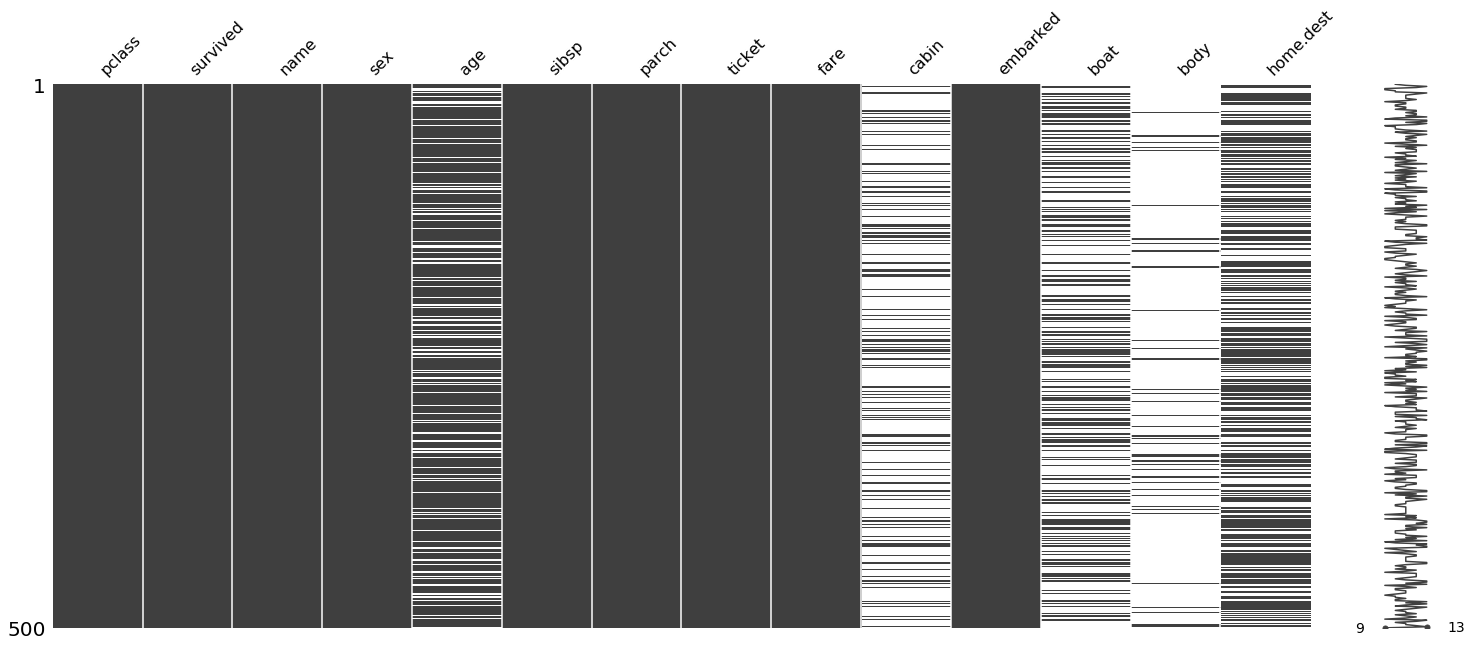

In [0]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))

we can use missingno library to create a bar of the missing data counts.

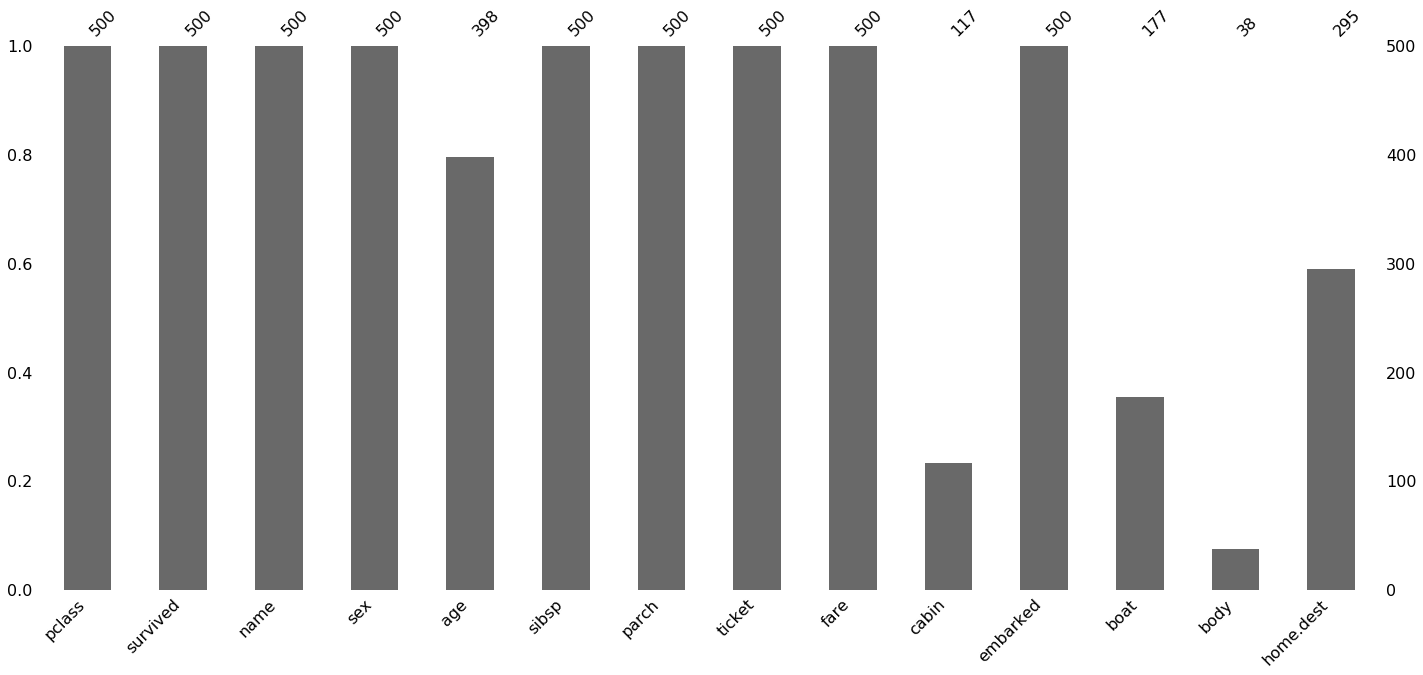

In [0]:
ax = msno.bar(orig_df.sample(500))

we can also create a bar plot of the missing data with pandas.

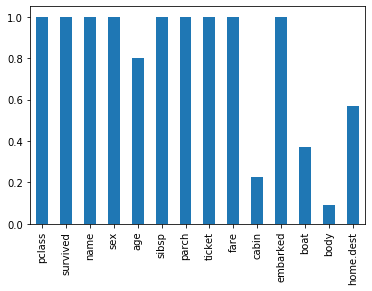

In [0]:
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

we can also create a heat map to see if there are correlations between the missing data.

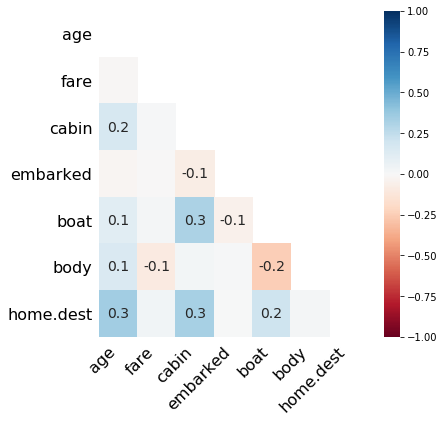

In [0]:
ax = msno.heatmap(df, figsize=(6, 6))

dropping missing data.
the pandas library can drop all rows with missing data.

In [0]:
df1= df.dropna()

we can drop columns by passing a list of names or a single name.

In [0]:
df1= df.drop(columns="cabin")

**Imputing data**
defining values for missing data is called imputing. 
if we impute data we need to build a pipeline and use the same imputation logic during model creation and prediction.
Simpleimputer in scikitlearn will handle mean, median and most frequent feature values.

In [0]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(
    include="number"
).columns
im = SimpleImputer()  # mean
imputed = im.fit_transform(df[num_cols])

provising startegy = 'median' or strategy = 'most_frequent' to change the missing value to the median or most common.

we can fill with a constant value (say -1) by choosing strategy = 'contstant' in combination with fill value = -1
most frequent and constant strategies may be used with numeric or string data (e.g embarked, home dest).

the mean and median strategies require numeric data (e.g age, fare). 

lack of data may provide a signal to he model. the pandas library can create a new column to indicate that a column was missing.

In [0]:
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)

    return wrapper

In [0]:

df1 = df.assign(
    cabin_missing=add_indicator("cabin")
)

In [0]:
df1.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'cabin_missing'],
      dtype='object')

In [0]:
df1.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1
